In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Create a sample dataset
data = {
    "Factor_A": [],
    "Factor_B": [],
    "Value": []
}

factor_a_levels = ["A1", "A2", "A3"]
factor_b_levels = ["B1", "B2", "B3"]

for a in factor_a_levels:
    for b in factor_b_levels:
        for _ in range(10):
            data["Factor_A"].append(a)
            data["Factor_B"].append(b)
            data["Value"].append(np.random.rand() + (0.2 if a == "A1" else 0) + (0.3 if b == "B1" else 0))

df = pd.DataFrame(data)
df.head(50)

C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Teerawat\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,Factor_A,Factor_B,Value
0,A1,B1,0.874540
1,A1,B1,1.450714
2,A1,B1,1.231994
3,A1,B1,1.098658
4,A1,B1,0.656019
5,A1,B1,0.655995
6,A1,B1,0.558084
7,A1,B1,1.366176
8,A1,B1,1.101115
9,A1,B1,1.208073


# The test involves three hypotheses:

1. Hypothesis for factor A: Is there a significant difference in the outcome across different levels of factor A?

2. Hypothesis for factor B: Is there a significant difference in the outcome across different levels of factor B?

3. Hypothesis for interaction: Is there a significant interaction between factor A and factor B?

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the two-way ANOVA
model = ols('Value ~ C(Factor_A) + C(Factor_B) + C(Factor_A):C(Factor_B)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#PR9(>F) = p-value 
anova_table

,sum_sq,df,F,PR(>F)
C(Factor_A),0.448946,2.0,2.351734,0.101674
C(Factor_B),2.409900,2.0,12.623886,0.000017
C(Factor_A):C(Factor_B),0.143571,4.0,0.376038,0.825114
Residual,7.731450,81.0,NaN,NaN


### 1. Hypothesis for factor A: Is there a significant difference in the outcome across different levels of factor A?

The p-value for Factor_A is 0.101674. Since it is greater than the significance level (0.05), 
we fail to reject the null hypothesis. This means there is no significant difference in the outcome across different levels of factor A.

### 2. Hypothesis for factor B: Is there a significant difference in the outcome across different levels of factor B?

The p-value for Factor_B is 0.000017. Since it is smaller than the significance level (0.05), we reject the null hypothesis. This means there is a significant difference in the outcome across different levels of factor B.

### 3.Hypothesis for interaction: Is there a significant interaction between factor A and factor B?

The p-value for the interaction between Factor_A and Factor_B is 0.825114. Since it is greater than the significance level (0.05), we fail to reject the null hypothesis. This means there is no significant interaction between factor A and factor B.

## In summary
There is no significant difference in the outcome across different levels of factor A, and there is no significant interaction between factor A and factor B. However, there is a significant difference in the outcome across different levels of factor B.

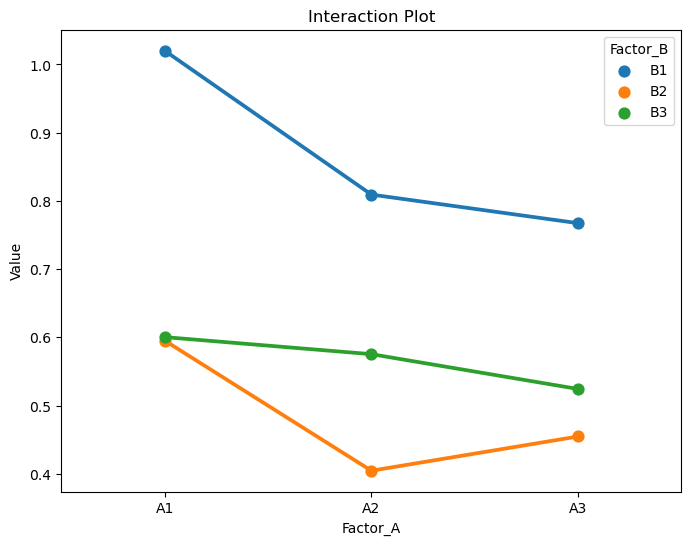

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the interaction between Factor_A and Factor_B
plt.figure(figsize=(8, 6))
sns.pointplot(x="Factor_A", y="Value", hue="Factor_B", data=df, ci=None)
plt.title("Interaction Plot")
plt.show()